In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression

In [7]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [8]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls"
concrete_data=pd.read_excel(url)


In [9]:
concrete_data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [17]:
concrete_data.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [19]:
concrete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [21]:
concrete_data.shape

(1030, 9)

In [29]:
print(concrete_data.columns)

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')


In [33]:
concrete_data.columns = ['Cement', 'Slag', 'FlyAsh', 'Water', 'Superplasticizer', 'CoarseAgg', 'FineAgg', 'Age', 'Strength']
concrete_data.head()

,Cement,Slag,FlyAsh,Water,Superplasticizer,CoarseAgg,FineAgg,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


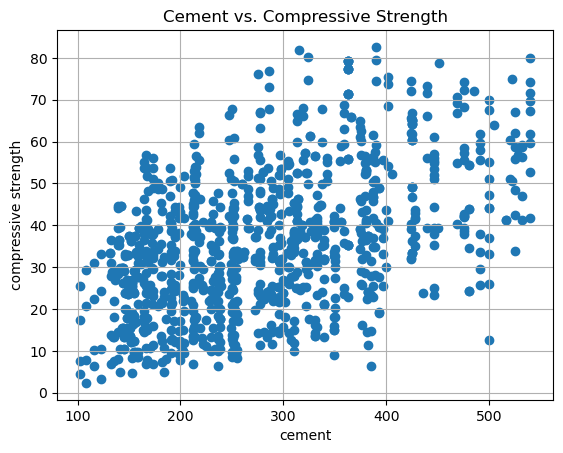

In [37]:
plt.scatter(x=concrete_data["Cement"],y=concrete_data["Strength"])
plt.xlabel("cement")
plt.ylabel("compressive strength")
plt.grid(True)
plt.title("Cement vs. Compressive Strength");

In [43]:
## Get and sort correlation values between all features and the target variable (compressive strength)

correlation_matrix=concrete_data.corr()
print("Correlation with compressive strength:")
print(correlation_matrix.iloc[-1,:-1].sort_values(ascending=True))

Correlation with compressive strength:
Water              -0.289613
FineAgg            -0.167249
CoarseAgg          -0.164928
FlyAsh             -0.105753
Slag                0.134824
Age                 0.328877
Superplasticizer    0.366102
Cement              0.497833
Name: Strength, dtype: float64


In [67]:
# Split data into features(X) and target(y)
X=concrete_data.iloc[:,:-1] # Features : All columns except the last column
y=concrete_data.iloc[:,-1] # Target only the last column
X_array=X.values #Pandas DataFrame -->> NumPy array
y_array=y.values #Pandas Series -->> NumPy array
print(f"Before conversion:{type(X)}")
print(f"After convsersion:{type(X_array)}")

Before conversion:<class 'pandas.core.frame.DataFrame'>
After convsersion:<class 'numpy.ndarray'>


In [69]:
#Split the data into training and testing set
# random_state ensures reproducible results by fixing the data split
# Set random_state to any integer to ensure reproducibility (42 is just a convention)


X_train,X_test, y_train,y_test=train_test_split(X_array,y_array,test_size=0.2,random_state=42)

print(f"taining_set shape:{X_train.shape}")

taining_set shape:(824, 8)


In [75]:
""" 
from sklearn.ensemble import RandomForestRegressor
This line imports the RandomForestRegressor class from Scikit-learn's ensemble module.

🌲 What is RandomForestRegressor?
It’s a machine learning model used for regression tasks (predicting continuous values).

It builds an ensemble (collection) of many decision trees, and averages their predictions for better accuracy and stability.

✅ Key Features:
Feature	Description
Ensemble Learning	Combines multiple trees to reduce overfitting and increase robustness.
Regression	Predicts numeric/continuous values (e.g., house prices, temperatures).
Handles Non-Linearity	Works well even when the relationship between inputs and outputs isn't linear.
Feature Importance	Can rank which input features are most influential.
 How It Works:
Each tree in the forest is trained on a random subset of the data (with replacement = "bagging").

Predictions are made by averaging the outputs of all trees
"""
from sklearn.ensemble import RandomForestRegressor 
# Train a linear regression model
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)

# Train a random forest model
"""
n_estimators=100
This tells the model to build 100 separate decision trees.

The final prediction is the average of all 100 trees' predictions.
Why it matters:
More trees usually give better performance (less overfitting, more stable predictions).

But more trees also mean slower training and prediction.

✅ In general:

n_estimators=10: fast but less accurate

n_estimators=100: good balance (default in many use cases)

n_estimators=500+: can be more accurate but slower
"""


rf_model=RandomForestRegressor(n_estimators=100,random_state=42) #Creates a random forest regression model.
                                                                 #n_estimators=100: The model will create 100 different decision trees.
                                                                 #The final prediction is the average of all these trees.
rf_model.fit(X_train,y_train) #Trains the random forest model on your training data.

# Make predictions 
"""
lr_predictions: Uses the linear regression model (lr_model) to predict values for your test set.

rf_predictions: Uses the random forest model (rf_model) to predict values for the same test set
"""
lr_predictions=lr_model.predict(X_test)
rf_predictions=rf_model.predict(X_test)
# Evaluate models
"""
Something new:
Even though both models are predicting the same target variable, their methods are completely different:

Linear regression uses a single equation/line to model relationships.

Random forest uses many trees and averages their results.
"""
"""
Stores the model names and their predictions in two lists so you can evaluate them using a loop — very clean and scalable design.
"""
models=["Linear Regression", "Random Forest"]
predictions =[lr_predictions, rf_predictions]
#zip() combines both lists (models, predictions) so you can loop through them in pairs.
for  model_name , pred in zip (models, predictions):
    mse=mean_squared_error(y_test,pred)
    #Computes R² score (also called the coefficient of determination)
    r2=r2_score(y_test,pred)
    #Prints each model’s name along with its MSE and R² for easy comparison.
    print(f"{model_name}:")
    print(f" Mean Sqaured Error :{mse:.2f}")
    print(f" R2 Score :{r2:.2f}")

Linear Regression:
 Mean Sqaured Error :95.98
 R2 Score :0.63
Random Forest:
 Mean Sqaured Error :30.36
 R2 Score :0.88


In [83]:
# Use NumPy's efficient arithmatic operations to create domain specific features 
cement_water_ratio=X_train[:,0]/X_train[:,3] # cement / water ratio
cement_water_ratio_test=X_test[:,0]/X_test[:,3]
# Add this new feature to our feature matrices using NumPy's array manipulation
X_train_enhanced=np.column_stack((X_train,cement_water_ratio))
X_test_enhanced=np.column_stack((X_test,cement_water_ratio_test))
# Train a model with the enchanced features 
from sklearn.ensemble import GradientBoostingRegressor 
model=GradientBoostingRegressor(n_estimators=100,random_state=42)
model.fit(X_train_enhanced,y_train)
predictions=model.predict(X_test_enhanced)

print(f"model with domian knowkedge:")
print(f" R2 Score: {r2_score(y_test,predictions):.2f}")


model with domian knowkedge:
 R2 Score: 0.89


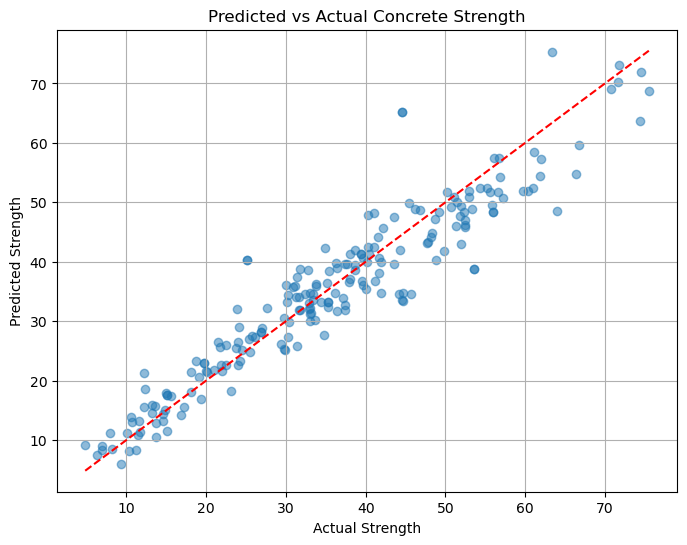

In [87]:
# Visualize Results 
plt.figure(figsize=(8,6))
plt.scatter(y_test,predictions,alpha=0.5)
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],'r--')
plt.xlabel("Actual Strength")
plt.ylabel("Predicted Strength")
plt.title("Predicted vs Actual Concrete Strength")
plt.grid(True)
plt.show()